In [1]:
!pip install wordcloud


In [2]:
import re              
import pandas as pd
import numpy as np
import nltk
import warnings
import matplotlib.pyplot as plt
pd.set_option("display.max_colwidth", 200)           #sets the maximum width for displaying columns in pandas dataframes to 200 characters
warnings.filterwarnings("ignore", category=DeprecationWarning)  #Ignores all Deprecation warnings
%matplotlib inline



#Loading the Training Data in a Pandas DataFrame
df_train = pd.read_csv('C:/Users/Harsh/Downloads/train.csv')

#Getting the number of Racist/Sexist(1) and Non-Racist/Sexist(0)
df_train['label'].value_counts()


#Loading the Testing Data in a Pandas DataFrame
df_test = pd.read_csv('C:/Users/Harsh/Downloads/test.csv')



#Displaying the first 100 Non-racist/sexist Tweets in the data
display(df_train[df_train['label']==0].head(100))
print('')

#Displaying the first 100 racist/sexist Tweets in the data
display(df_train[df_train['label']==1].head(100))



#Dimensions of the train and test dataset.
print("Train Dataset Shape: ",df_train.shape,"\nTest Dataset Shape: ",df_test.shape)
print('')
#print(df_train['label'].value_counts())

#Percentage of Racist and Non-Racist Tweets.
percent = len(df_train[df_train['label']==1])*100/len(df_train['label'])
print('\nPercentage of Racisct Tweets in the Training Data: ',percent)
print('Percent Non-Racist Tweets in the Training Data: ',100-percent)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
...,...,...,...
104,105,0,going to la tomorrow!!!
105,106,0,i am thankful for good friends. #thankful #positive
106,107,0,i still can not wrap my head around the fact that #christinagrimmie is gone. and the fact that a man destroyed #prayfororlando just
107,108,0,just received dis from @user can't wait to sta baking #eyelids .ðððððð ðððâ¦


,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
...,...,...,...
1366,1367,1,@user @user @user because we have been #shuckin'andjivin for the #democraticpay that only want our vote!
1374,1375,1,if you didn't like or #hitler you're definitely not going to like #traitor. #trump
1382,1383,1,just because you #liberals are self-loathing doesn't mean the rest of us are. the only weapon you have is to yellâ¦
1392,1393,1,@user buffalo school districts boots trump ally over racist comments. #birdsofafeather #resist :


Train Dataset Shape:  (31962, 3) 
Test Dataset Shape:  (17197, 2)


Percentage of Racisct Tweets in the Training Data:  7.014579813528565
Percent Non-Racist Tweets in the Training Data:  92.98542018647143


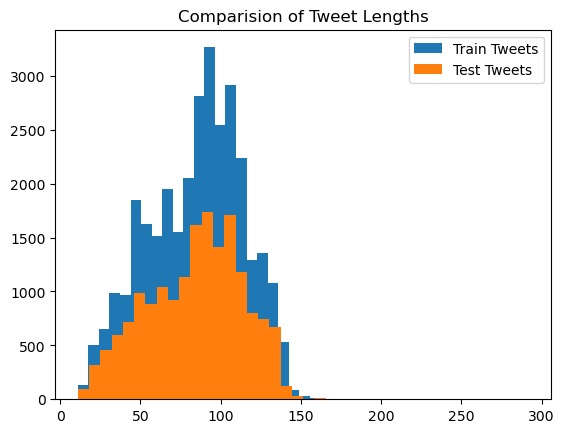

In [3]:
#Now we will check the distribution of length of the tweets, in terms of words, in both train and test data.

length_train = df_train['tweet'].str.len()
length_test = df_test['tweet'].str.len()

plt.hist(length_train,bins=40,label='Train Tweets')
plt.hist(length_test,bins=40,label='Test Tweets')
plt.legend()
plt.title('Comparision of Tweet Lengths')
plt.show()

In [4]:
#Combining Test and Train Datasets for Data Cleaning
combined_df = pd.concat([df_train, df_test], axis=0)

# Reset the index of the combined data frame
combined_df = combined_df.reset_index(drop=True)

print(combined_df.shape)
display(combined_df)

(49159, 3)


,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation
...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #trump #uselections2016 #leadership #politics #brexit #blm &gt;3
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverready #formal #wedding #gown #dresses #mermaid â¦
49156,49157,NaN,"#hillary #campaigned today in #ohio((omg)) &amp; used words like ""assets&amp;liability"" never once did #clinton say thee(word) #radicalization"
49157,49158,NaN,"happy, at work conference: right mindset leads to culture-of-development organizations #work #mindset"


In [5]:
#function to remove unwanted text patterns from the tweet
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

#function to replace non alphanumeric with space from the tweet
def replace_non_alphanumeric_with_space(string):
    replaced_string = re.sub(r'[^a-zA-Z0-9#]+', ' ', string)
    return replaced_string


In [6]:
#Removing @user from all tweets
combined_df['tidy_tweet'] = combined_df['tweet'].apply(lambda x: remove_pattern(x, "@[user]*"))

#Removing Unwanted and un-necessary punctuations and symbols
combined_df['tidy_tweet'] = combined_df['tidy_tweet'].apply(replace_non_alphanumeric_with_space)

#combined_df['tidy_tweet'] = combined_df['tidy_tweet'].str.replace(r'[\W_]+', " ")

combined_df.head(10)


,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,2 2 huge fan fare and big talking before they leave chaos and pay disputes when they get there #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams can t think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won love the land #allin #cavs #champions #cleveland #clevelandcavaliers
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here i m it s so #gr8


In [7]:

#Removing Short Words
combined_df['tidy_tweet'] = combined_df['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combined_df

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation
...,...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #trump #uselections2016 #leadership #politics #brexit #blm &gt;3,thought factory left right polarisation #trump #uselections2016 #leadership #politics #brexit #blm
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverready #formal #wedding #gown #dresses #mermaid â¦,feeling like mermaid #hairflip #neverready #formal #wedding #gown #dresses #mermaid
49156,49157,NaN,"#hillary #campaigned today in #ohio((omg)) &amp; used words like ""assets&amp;liability"" never once did #clinton say thee(word) #radicalization",#hillary #campaigned today #ohio used words like assets liability never once #clinton thee word #radicalization
49157,49158,NaN,"happy, at work conference: right mindset leads to culture-of-development organizations #work #mindset",happy work conference right mindset leads culture development organizations #work #mindset


In [8]:

#Tokenization
tokenized_tweet = combined_df['tidy_tweet'].apply(lambda x: x.split()) # tokenizing
print(tokenized_tweet.head())
print('')

0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object



In [9]:
#Text Normalization
from nltk.stem.porter import *

stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

#Detokenization
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
combined_df['tidy_tweet'] = tokenized_tweet

display(combined_df)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunct selfish drag kid into dysfunct #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thank #lyft credit caus they offer wheelchair van #disapoint #getthank
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv
...,...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #trump #uselections2016 #leadership #politics #brexit #blm &gt;3,thought factori left right polaris #trump #uselections2016 #leadership #polit #brexit #blm
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverready #formal #wedding #gown #dresses #mermaid â¦,feel like mermaid #hairflip #neverreadi #formal #wed #gown #dress #mermaid
49156,49157,NaN,"#hillary #campaigned today in #ohio((omg)) &amp; used words like ""assets&amp;liability"" never once did #clinton say thee(word) #radicalization",#hillari #campaign today #ohio use word like asset liabil never onc #clinton thee word #radic
49157,49158,NaN,"happy, at work conference: right mindset leads to culture-of-development organizations #work #mindset",happi work confer right mindset lead cultur develop organ #work #mindset


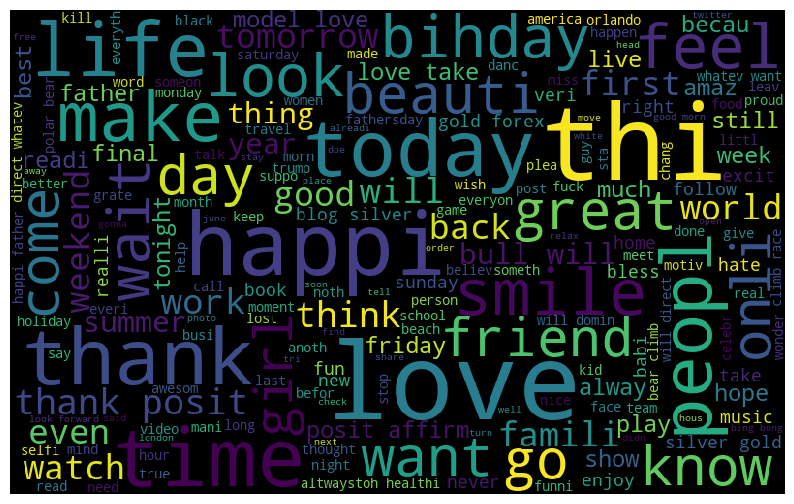


collecting the most frequent words visible in the wordCloud


In [10]:
# === Cell Separator ===

all_words = ' '.join([text for text in combined_df['tidy_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 500, random_state = 21,
                     max_font_size = 110).generate(all_words)
plt.figure(figsize = (10,7))
plt.imshow(wordcloud, interpolation = 'nearest')
plt.axis('off')
plt.show()
print('')
print('collecting the most frequent words visible in the wordCloud')

In [11]:
# Getting the word frequencies from the word cloud
word_frequencies = wordcloud.words_

# Sorting the word frequencies in descending order
sorted_word_frequencies = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)

# Extract the most frequent words and their frequencies
top_words = sorted_word_frequencies[:10]  # Change the number as desired

# Print the most frequent words and their frequencies
for word, frequency in top_words:
    print(f"{word}: {frequency}")


love: 1.0
thi: 0.9570785739010038
happi: 0.6452059536171686
time: 0.5517480096919349
today: 0.5105572862582208
thank: 0.5088265835929388
life: 0.45794392523364486
peopl: 0.41259951540325374
make: 0.4001384562132226
smile: 0.34890965732087226


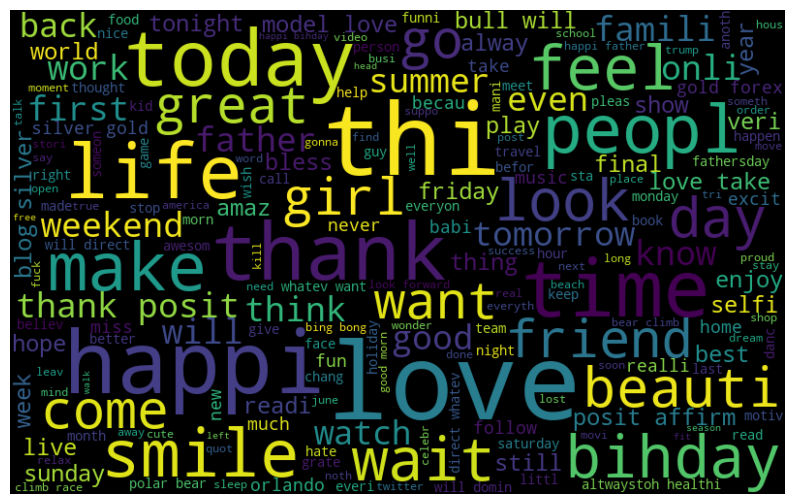

In [12]:
#Most common words in normal/positive tweets
normal_words = ' '.join([text for text in combined_df['tidy_tweet'][combined_df['label'] == 0]])
wordcloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

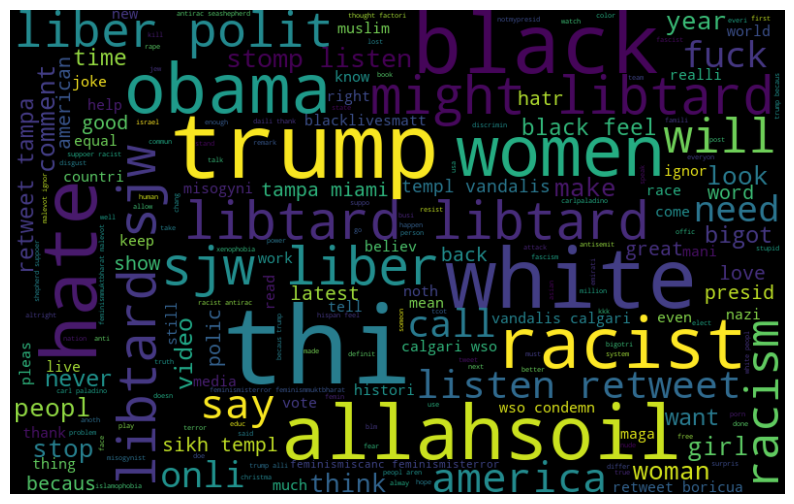

In [13]:

#racist Words
negative_words = ' '.join([text for text in combined_df['tidy_tweet'][combined_df['label'] == 1]])

wordcloud = WordCloud(width = 800, height = 500, random_state = 21,max_font_size = 110).generate(negative_words)
plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

# === Cell Separator ===

#Exploring hashtags on tweets sentiment

# Defining a function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

#extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(combined_df['tidy_tweet']
                            [combined_df['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combined_df['tidy_tweet']
                            [combined_df['label']== 1])

# Unnesting/flattening list
HT_regular = sum(HT_regular, [])
HT_negative = sum(HT_negative, [])
#HT_regular

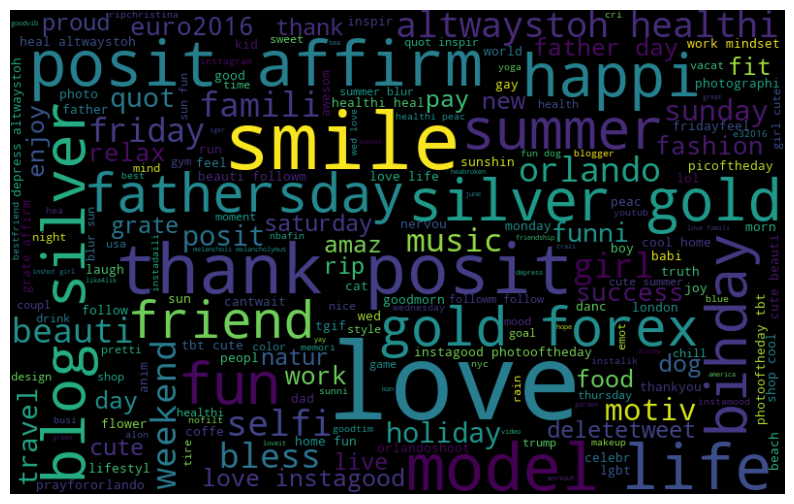

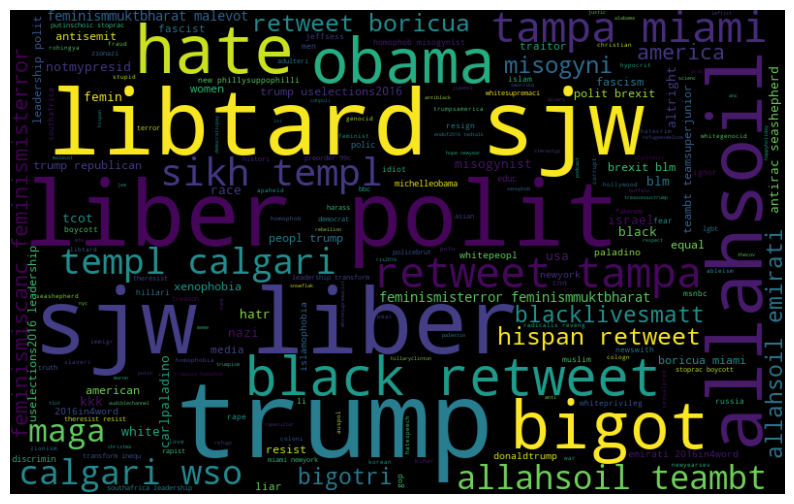

In [14]:
regular_hash = ' '.join([text for text in HT_regular])

wordcloud = WordCloud(width = 800, height = 500, random_state = 21,max_font_size = 110).generate(regular_hash)
plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

# === Cell Separator ===

negative_hash = ' '.join([text for text in HT_negative])

wordcloud = WordCloud(width = 800, height = 500, random_state = 21,max_font_size = 110).generate(negative_hash)
plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [15]:
#BagOfWords
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
import gensim

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000,   stop_words='english')
bow = bow_vectorizer.fit_transform(combined_df['tidy_tweet'])
bow.shape



# === Cell Separator ===

#TF-IDF Model
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000,
                     stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combined_df['tidy_tweet'])
tfidf.shape

(49159, 1000)

In [16]:

#Word2Vec Model
tokenized_tweet = combined_df['tidy_tweet'].apply(lambda x: x.split()) # tokenizing
model_w2v = gensim.models.Word2Vec(tokenized_tweet,vector_size=200, window=5,min_count = 2,sg = 1,hs= 0,negative = 10,workers =2,seed= 34)
model_w2v.train(tokenized_tweet, total_examples= len(combined_df['tidy_tweet']), epochs=20)

#Testing the Word2Vec
model_w2v.wv.most_similar(positive="trump")


[('donald', 0.597481906414032),
 ('melo', 0.563901960849762),
 ('hillari', 0.5583189129829407),
 ('#delegaterevolt', 0.5576931834220886),
 ('tomlin', 0.5441266894340515),
 ('nomine', 0.5438710451126099),
 ('unstabl', 0.5431623458862305),
 ('phoni', 0.5400345921516418),
 ('unfavor', 0.5362574458122253),
 ('potu', 0.5289620757102966)]

In [17]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1
        except KeyError:  # handling the case where the token is not in vocabulary
            continue
    if count != 0:
        vec /= count
    return vec

# === Cell Separator ===

wordvec_arrays = np.zeros((len(tokenized_tweet), 200))
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i, :] = word_vector(tokenized_tweet[i], 200)

wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape


(49159, 200)

In [18]:
# Importing the Required Libraries and modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score as sklearn_roc_auc_score


In [19]:
# Extracting train and test BoW features
train_bow = bow[:31962, :]
test_bow = bow[31962:, :]

# Splitting the data into training and validation sets
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, df_train['label'], random_state=42, test_size=0.3
)

# Initialize and train the logistic regression model
lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain)

# Make predictions on the validation set
prediction = lreg.predict_proba(xvalid_bow)
prediction_int = (prediction[:, 1] >= 0.3).astype(int)

# Calculate the F1 score for the validation set
f1_val = f1_score(yvalid, prediction_int)
roc_auc_val = sklearn_roc_auc_score(yvalid, prediction[:, 1])
accuracy_val = accuracy_score(yvalid, prediction_int)

print("The f1-score for using only the bag-of-words features is: {}".format(f1_val))
print("The ROC-AUC-Score for using only the bag-of-words features is: {}".format(roc_auc_val))
print("The Accuracy Score for using only the bag-of-words features is: {}".format(accuracy_val))


The f1-score for using only the bag-of-words features is: 0.550413223140496
The ROC-AUC-Score for using only the bag-of-words features is: 0.9119870727727047
The Accuracy Score for using only the bag-of-words features is: 0.9432683282928356


In [20]:

test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(int)
df_test['label'] = test_pred_int
submission = df_test[['id','label']]
submission.to_csv('C:/Users/Harsh/Downloads/sub_lreg_bow.csv', index=False) # writing data to a CSV file

# === Cell Separator ===

train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]
xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]
lreg.fit(xtrain_tfidf, ytrain)
prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(int)

f1_val = f1_score(yvalid, prediction_int)
roc_auc_val = sklearn_roc_auc_score(yvalid, prediction[:, 1])
accuracy_val = accuracy_score(yvalid, prediction_int)

print("The f1-score for using only the TF-IDF features is: {}".format(f1_val))
print("The ROC-AUC-Score for using only the TF-IDF features is: {}".format(roc_auc_val))
print("The Accuracy Score for using only the TF-IDF features is: {}".format(accuracy_val))

# === Cell Separator ===

# Make predictions on the test TF-IDF features
test_pred_tfidf = lreg.predict_proba(test_tfidf)
test_pred_int_tfidf = (test_pred_tfidf[:, 1] >= 0.3).astype(int)

# Create a DataFrame for submission
df_test['label'] = test_pred_int_tfidf
submission_tfidf = df_test[['id', 'label']]

# Save the submission DataFrame to a CSV file
submission_tfidf.to_csv('C:/Users/Harsh/Downloads/sub_lreg_tfidf.csv', index=False)

# === Cell Separator ===

train_w2v = wordvec_df.iloc[:31962,:]
test_w2v = wordvec_df.iloc[31962:,:]
xtrain_w2v = train_w2v.iloc[ytrain.index,:]
xvalid_w2v = train_w2v.iloc[yvalid.index,:]
lreg.fit(xtrain_w2v, ytrain)
prediction = lreg.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(int)

f1_val = f1_score(yvalid, prediction_int)
roc_auc_val = sklearn_roc_auc_score(yvalid, prediction[:, 1])
accuracy_val = accuracy_score(yvalid, prediction_int)

print("The f1-score for using only the Word2Vector features is: {}".format(f1_val))
print("The ROC-AUC-Score for using only the Word2Vector features is: {}".format(roc_auc_val))
print("The Accuracy Score for using only the Word2Vector features is: {}".format(accuracy_val))

# === Cell Separator ===

# Make predictions on the test TF-IDF features
test_pred_w2v = lreg.predict_proba(test_w2v)
test_pred_int_w2v = (test_pred_w2v[:, 1] >= 0.3).astype(int)

# Create a DataFrame for submission
df_test['label'] = test_pred_int_w2v
submission_w2v = df_test[['id', 'label']]

# Save the submission DataFrame to a CSV file
submission_w2v.to_csv('C:/Users/Harsh/Downloads/sub_lreg_w2v.csv', index=False)

# === Cell Separator ===

#Loading the Predicted DataSets

bow_pred = pd.read_csv('C:/Users\Harsh\Downloads/sub_lreg_bow.csv')
tfidf_pred = pd.read_csv('C:/Users\Harsh\Downloads/sub_lreg_tfidf.csv')
w2v_pred = pd.read_csv('C:/Users/Harsh/Downloads/sub_lreg_w2v.csv')

# === Cell Separator ===

print('Predicted labels according to BOW:')
print(bow_pred['label'].value_counts())
print('')

print('Predicted labels according to TF-IDF:')
print(tfidf_pred['label'].value_counts())
print('')

print('Predicted labels according to Word2Vector:')
print(w2v_pred['label'].value_counts())
print('')

The f1-score for using only the TF-IDF features is: 0.5556529360210342
The ROC-AUC-Score for using only the TF-IDF features is: 0.9099958627619018
The Accuracy Score for using only the TF-IDF features is: 0.9471269162582125
The f1-score for using only the Word2Vector features is: 0.6291635825314582
The ROC-AUC-Score for using only the Word2Vector features is: 0.939885355818894
The Accuracy Score for using only the Word2Vector features is: 0.947752633225571
Predicted labels according to BOW:
label
0    16181
1     1016
Name: count, dtype: int64

Predicted labels according to TF-IDF:
label
0    16304
1      893
Name: count, dtype: int64

Predicted labels according to Word2Vector:
label
0    15947
1     1250
Name: count, dtype: int64

